### Aim :-

Build the Random Forest Bagging Model using scikit learn in Boston Dataset to predict 'Hosue Price' based on other dependent variable.

### Import Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [3]:
from sklearn import datasets 
boston = datasets.load_boston()

In [4]:
data = pd.DataFrame(boston.data,columns=boston.feature_names)
target = boston.target

In [5]:
data['MEDV'] = target

### Describes the dataset columns:-

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000s

### Display Top 5 Rows

In [6]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

### Display Last 5 rows

In [7]:
data.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9

### Data Profiling

#### 1) Size of Dataset 

In [8]:
data.shape

(506, 14)

There will be 506 rows and 14 columns present in the dataset.

#### 2) Number of missing values per column

In [9]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No Nan values parsent in the data set. 

#### 3) Data types of columns 

In [10]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

#### 4) Number of duplicate rows

In [11]:
duplicates_data = data[data.duplicated()]

print("Total duplicates rows in the dataset : ",duplicates_data.shape[0])

Total duplicates rows in the dataset :  0


### Statistical Information

The statistics that are generated by the describe() method:

1) count tells us the number of NoN-empty rows in a feature.

2) mean tells us the mean value of that feature.

3) std tells us the Standard Deviation Value of that feature.

4) min tells us the minimum value of that feature.

5) 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.

6) max tells us the maximum value of that feature.

In [12]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

### Explotary Data Analysis (EDA)

##### 1) Scatter Plot of all Independent features against dependent feature "MEDV"

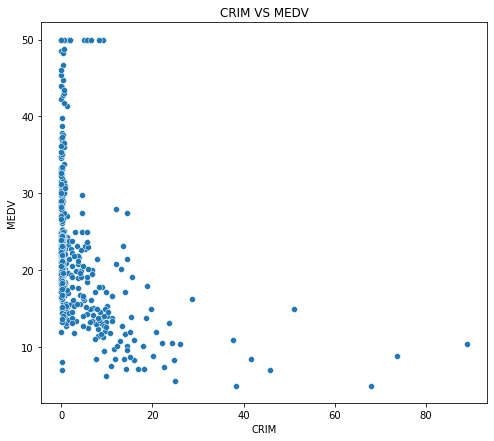

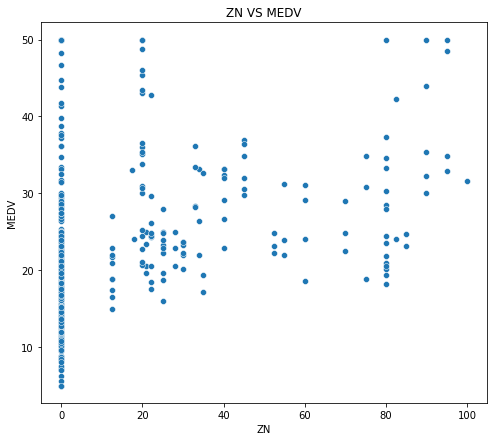

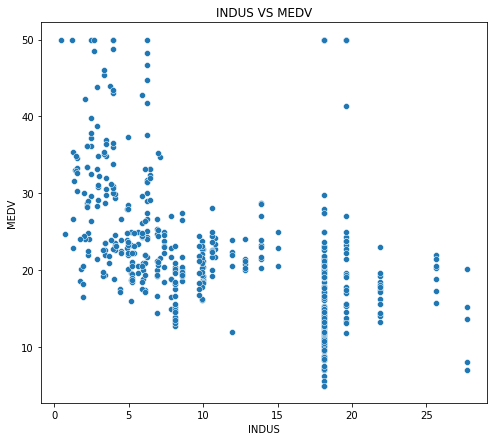

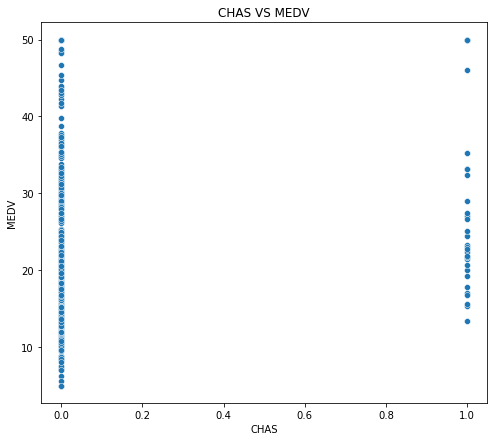

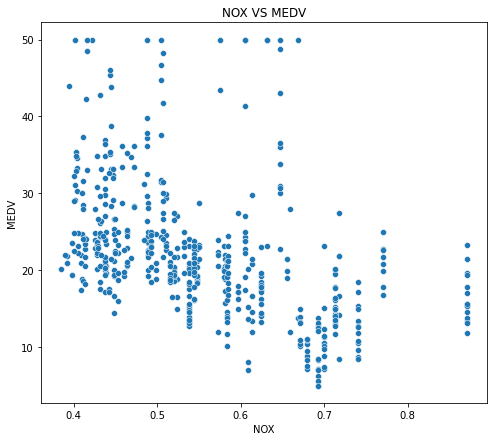

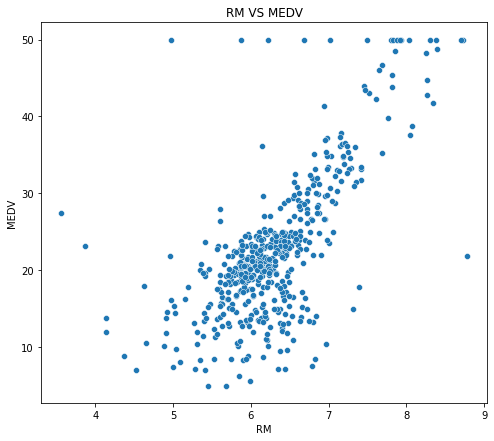

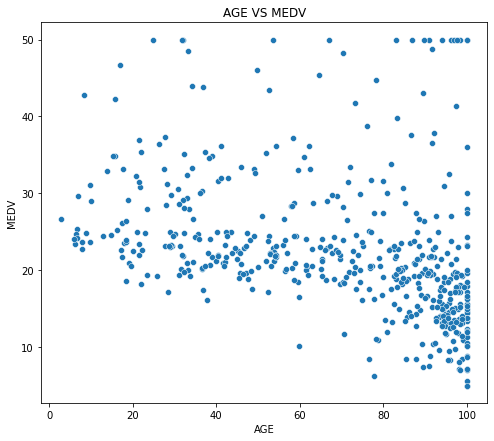

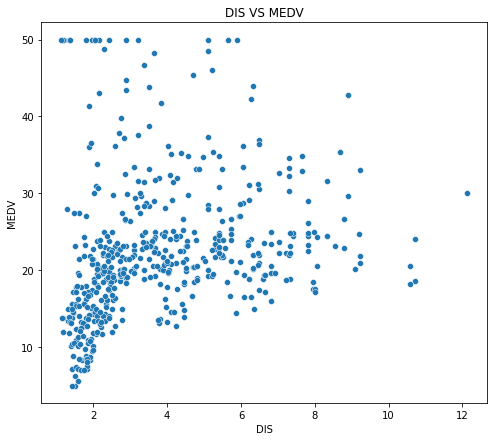

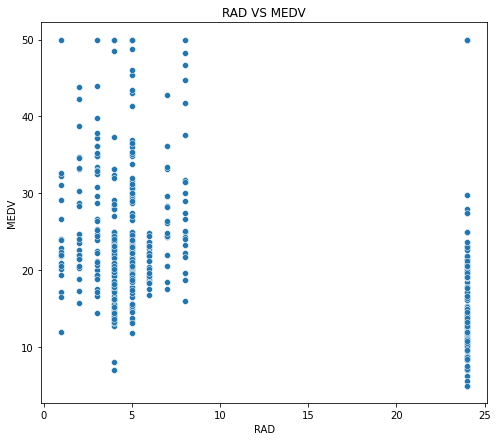

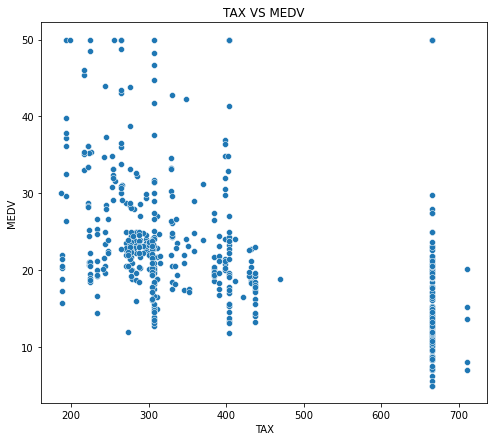

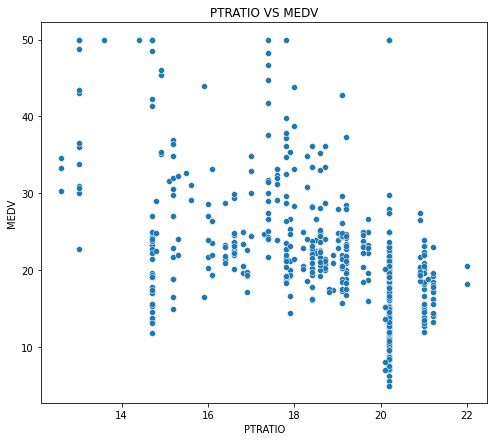

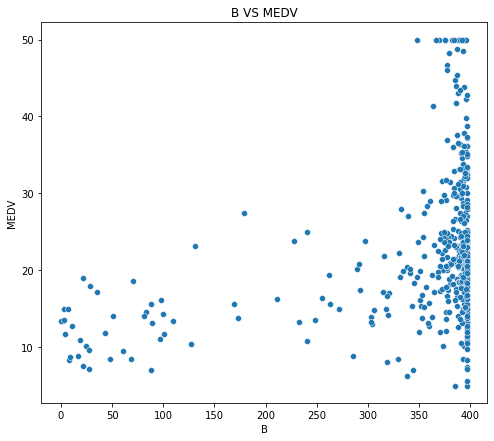

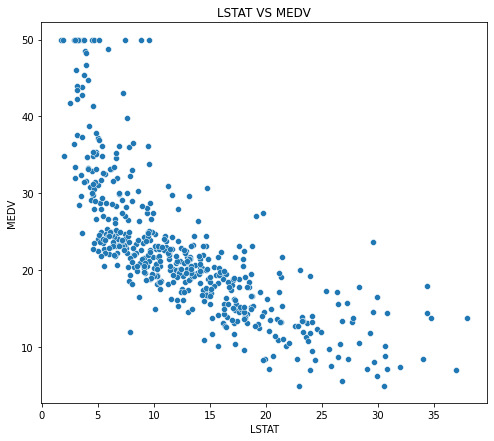

In [13]:
for column in data.columns :
    if column != "MEDV":
        plt.figure(figsize = (8,7))
        plt.xlabel(column)
        plt.ylabel("MEDV")
        plt.title(column + " VS MEDV")
        sns.scatterplot(data = data , x = column , y = data["MEDV"])
        plt.plot()

##### 2) Bar plot of all features

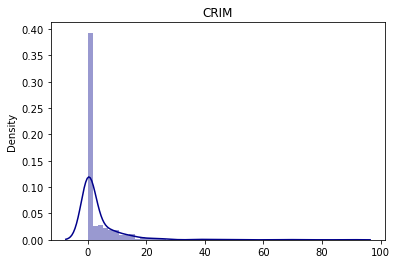

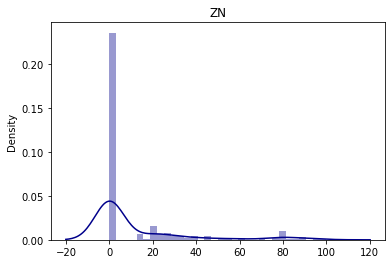

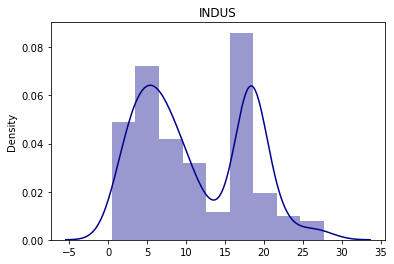

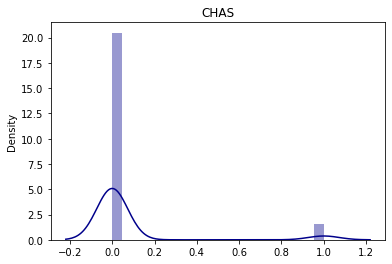

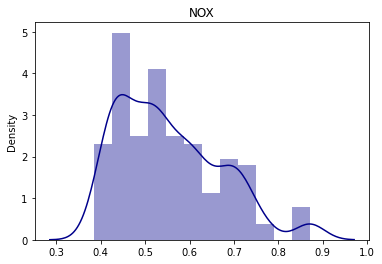

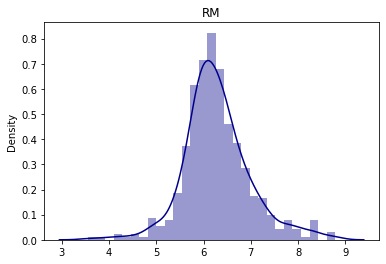

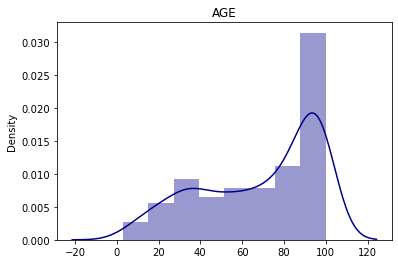

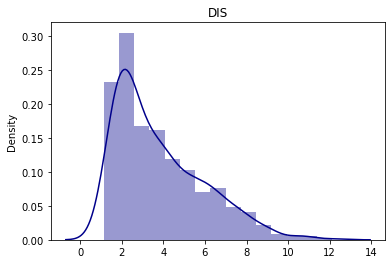

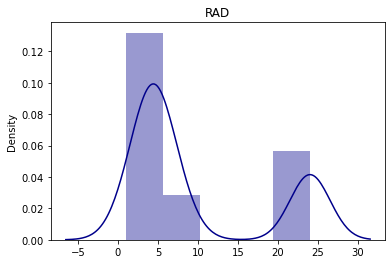

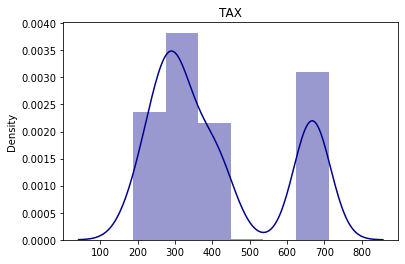

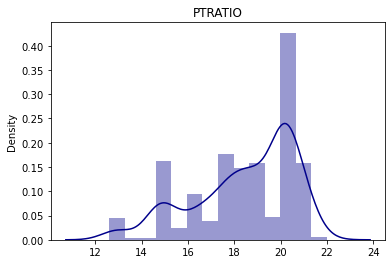

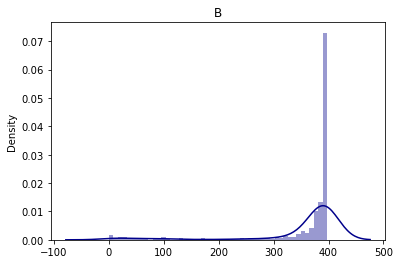

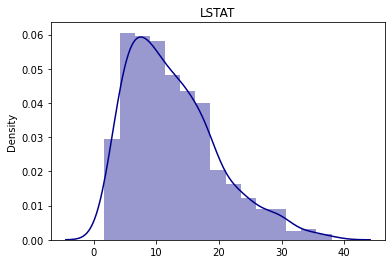

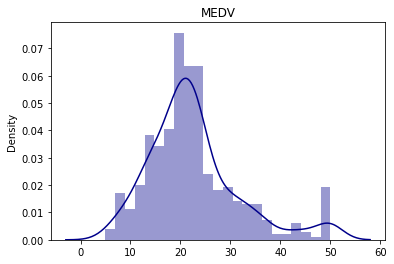

In [14]:
for column in data.columns:
    plt.title(column)
    sns.distplot(x = data[column],color="darkblue")
    plt.show()

##### Observation :-

1) "MEDV" , "RM" are distributed normally with few outliers.

2) "LSTAT" , "PTRATIO" ,"DIS" ,"AGE" ,"NOX" ,"INDUS" are skewed distributed .

##### 3) Boxplot

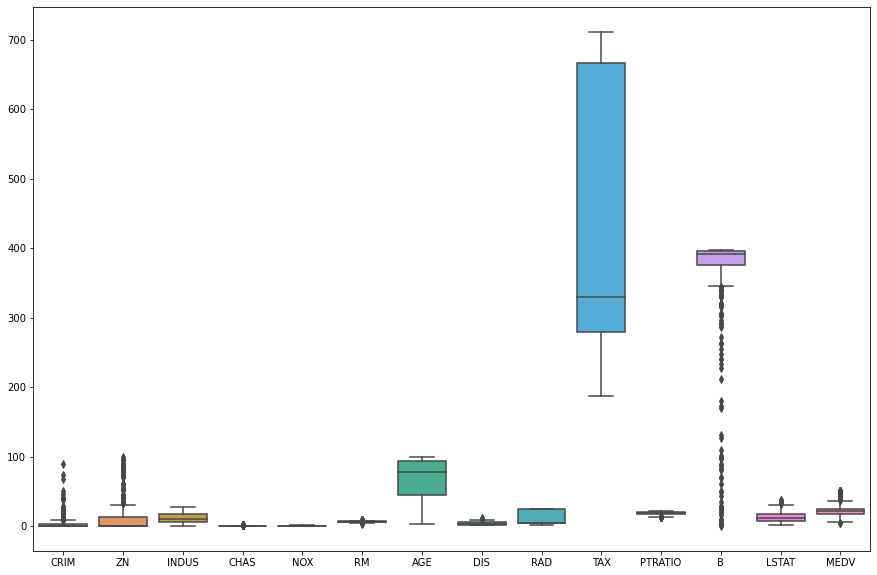

In [15]:
plt.figure(figsize = (15,10))
sns.boxplot(data = data)
plt.show()

In [16]:
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        inter_q = q3 - q1
        v_col = v[(v <= q1 - 1.5 * inter_q) | (v >= q3 + 1.5 * inter_q)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


##### Observation :-

1) "TAX" , "RAD" , "AGE" , "INDUS" , "NOX" Column does not contain Outliers.

2) "CHAS" Column Contain 100% Outliers.

3) Other Column Contain Less Than 15% Outlier.

##### 4) Correlation Graph

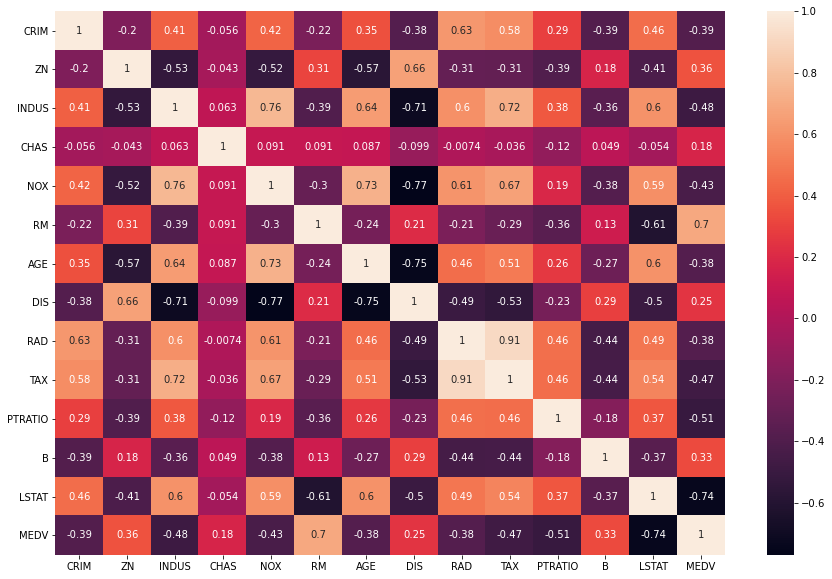

In [17]:
## Correlation between variables
plt.figure(figsize=(15,10), facecolor='white')
sns.heatmap(data=data.corr(), annot=True)

##### Observation :-

1) "RM" , "LSTAT" columns are highly Correlate with our target variable "MEDV".

2) The features "RAD" ,"TAX" have a correlation of 0.91.So, These features cause multi-co-linearity Problem.

3) The columns "LSTAT", "INDUS", "RM", "NOX", "PTRAIO" has a correlation score above 0.5 with MEDV

4) Correlation Value of Other Features with our target variable "MEDV" is less than 0.5.

##### Correlation Value of Independent Features With Our Dependent Features.

In [18]:
data.corr()["MEDV"][:-1].sort_values(ascending=True)

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
Name: MEDV, dtype: float64

##### 5) Line plot

In [19]:
import plotly.express as px
for column in data.columns : 
    if column != "MEDV":
        fig = px.line(x = column , y = "MEDV" , data_frame = data)
        fig.show()

There is no Perfect Linear Relationship Exit Between Dependent and Independent Variables.

### Observation  From EDA :-

1) There is no Perfect Linear Relationship Exit Between Dependent and Independent Variables So, We Do Not Use LinearRegression , Lasso , ElasticNet , Ridge Model for Prediction.

2) Our Features Contain Outlier So, We Select Those Machine Learning Model Which Cannot Be Effected By Outliers.

3) Correlation value between "RAD" ,"TAX" is 0.91.So, These features cause multi-co-linearity Problem.


### Splitting Data Into Dependent And Independent Feature 

In [20]:
dataset = data.drop(columns = ["MEDV"])
dataset.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [21]:
target = data["MEDV"]
target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### Feature Selection

In [22]:
from sklearn.feature_selection import SelectKBest , chi2

In [23]:
y = np.round(data["MEDV"])

In [24]:
bestfeatures = SelectKBest(score_func=chi2, k="all")
fit = bestfeatures.fit(dataset,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dataset.columns)

In [25]:
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ["features","Score"] #naming the dataframe columns
featureScores.sort_values(by = "Score",ascending=False)

features         Score
9       TAX  14817.836927
1        ZN   5937.859414
0      CRIM   5503.817133
11        B   3340.486412
6       AGE   2424.308937
8       RAD   1445.257647
12    LSTAT   1430.549632
2     INDUS    873.746270
7       DIS    163.919426
3      CHAS     59.080170
10  PTRATIO     45.692587
5        RM     21.981504
4       NOX      5.073299

In [26]:
# print 8 best features
print(featureScores.nlargest(8,"Score")) 

   features         Score
9       TAX  14817.836927
1        ZN   5937.859414
0      CRIM   5503.817133
11        B   3340.486412
6       AGE   2424.308937
8       RAD   1445.257647
12    LSTAT   1430.549632
2     INDUS    873.746270


### Feature Importance

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

In [28]:
model = ExtraTreesClassifier()

In [29]:
model.fit(dataset,y)

ExtraTreesClassifier()

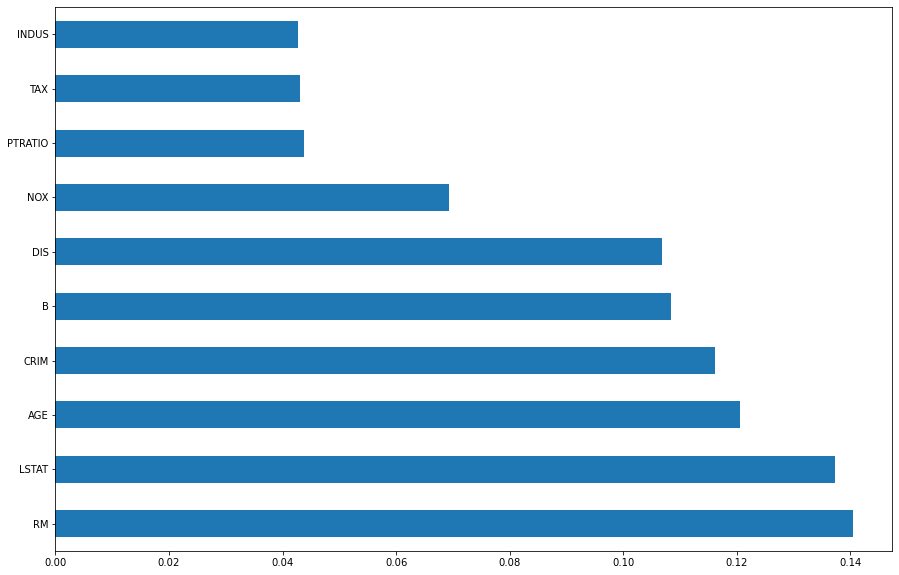

In [30]:
# Important Features rated by target variable correlation
feat_importances = pd.Series(model.feature_importances_, index=dataset.columns)
plt.figure(figsize = (15,10))
feat_importances.nlargest(10).plot(kind="barh")
plt.show()

##### Observation :-

For Predictions of Boston House Price we are Selecting top 7 rated Features "TAX","ZN" , "CRIM" , "B" , "AGE" , "RAD" , "LSTAT" ,"INDUS"

In [31]:
dataset = data[["TAX","ZN" , "CRIM" , "B" , "AGE" , "RAD" , "LSTAT" ,"INDUS"]]
dataset

TAX    ZN     CRIM       B   AGE  RAD  LSTAT  INDUS
0    296.0  18.0  0.00632  396.90  65.2  1.0   4.98   2.31
1    242.0   0.0  0.02731  396.90  78.9  2.0   9.14   7.07
2    242.0   0.0  0.02729  392.83  61.1  2.0   4.03   7.07
3    222.0   0.0  0.03237  394.63  45.8  3.0   2.94   2.18
4    222.0   0.0  0.06905  396.90  54.2  3.0   5.33   2.18
..     ...   ...      ...     ...   ...  ...    ...    ...
501  273.0   0.0  0.06263  391.99  69.1  1.0   9.67  11.93
502  273.0   0.0  0.04527  396.90  76.7  1.0   9.08  11.93
503  273.0   0.0  0.06076  396.90  91.0  1.0   5.64  11.93
504  273.0   0.0  0.10959  393.45  89.3  1.0   6.48  11.93
505  273.0   0.0  0.04741  396.90  80.8  1.0   7.88  11.93

[506 rows x 8 columns]

In [32]:
target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

### Spliting Data Set into train and test Data

In [33]:
from sklearn.model_selection import train_test_split

In [55]:
x_train , x_test , y_train , y_test = train_test_split(dataset,target,random_state = 1,test_size = 0.20)

In [56]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((404, 8), (102, 8), (404,), (102,))

### Implementation of Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
model = RandomForestRegressor()

In [59]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [60]:
# Training Score
model.score(x_train,y_train)

0.9640140078645566

In [61]:
# Testing Score
model.score(x_test,y_test)

0.8299418787913824

In [62]:
y_pred = model.predict(x_test)

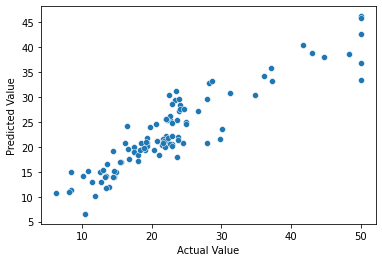

In [64]:
# Visualizing Differnece Between Actual And Predicted Value
sns.scatterplot(x=y_test , y = y_pred)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

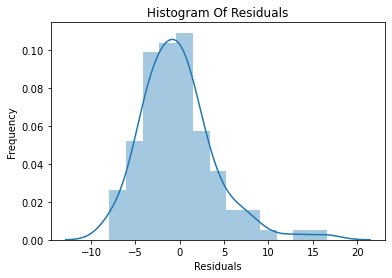

In [67]:
# Histogram Of Residuals 
sns.distplot(y_test-y_pred)
plt.title("Histogram Of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Our model accuracy score for train and test data are differ from each other.So, our model may in overfitting condition.

### Implementation of GridSearchCV model 

In [69]:
from sklearn.model_selection import GridSearchCV 

In [83]:
grid_param = {
    "n_estimators" : [100,200,300,350,400],
    'criterion': ["mse", "mae"],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [84]:
grid_search = GridSearchCV(estimator=model,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [85]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [4, 5, 6, 7, 8],
                         'n_estimators': [100, 200, 300, 350, 400]},
             verbose=3)

In [86]:
# the best parameters as per our grid search
grid_search.best_params_

{'criterion': 'mae',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [87]:
rand_reg = RandomForestRegressor(criterion= 'mae',max_features = 'log2',min_samples_leaf = 1,min_samples_split= 5,n_estimators = 200,random_state=1)

In [88]:
rand_reg.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_features='log2', min_samples_split=5,
                      n_estimators=200, random_state=1)

In [89]:
rand_reg.score(x_train,y_train)

0.9430492685113062

In [90]:
rand_reg.score(x_test,y_test)

0.8007260622250829

Our accuracy has not improved So, we can say that giving all the hyperparameters in the gridSearch doesn't gurantee the best result. We have to do hit and trial with parameters to get the perfect score.

You are welcome to try tweaking the parameters more and try an improve the accuracy more.

In [92]:
y_pred = rand_reg.predict(x_test)

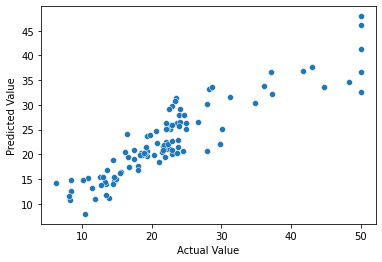

In [93]:
# Visualizing Differnece Between Actual And Predicted Value
sns.scatterplot(x=y_test , y = y_pred)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

In [91]:
import pickle
filename = 'randomforest_model.pickle'
pickle.dump(rand_reg, open(filename, 'wb'))